In [ ]:
import json

# Load the JSON file
with open('outcomes/prize_impact_results.json', 'r') as f:
    all_results = json.load(f)

In [4]:
# Extract ATE values for each prize
ate_by_prize = {}
for prize, books in all_results.items():
    ate_values = [book_data['ATE'] for book_data in books.values() if book_data['ATE'] is not None]
    ate_by_prize[prize] = ate_values

display(ate_by_prize)

{'Pulitzer Prize for Fiction': [1232.1681042391867,
  491.19615114821926,
  2038.6247234647758,
  928.5993160590001,
  5241.799957178195,
  6644.113736926051],
 'National Book Award': [785.8621317357731,
  143.5680830596871,
  1610.894483812748,
  924.3677973392788,
  4903.366770567872,
  408.6442560599439,
  2106.2401405557234,
  1065.0384383347885],
 'Hugo Award': [2965.5077979334833,
  619.840499357488,
  880.6965670328685,
  771.5851213615293,
  128.97247550561949,
  1.4027920114970538],
 'Deutscher Buchpreis': [1.9765545299692389,
  2.431705733793169,
  0.3590500646269037,
  0.7423174569835737,
  1.6738319477438608,
  7.3580348070488855,
  2.238943595015746],
 'Booker Prize': [4.236359899229717,
  282.1793295725691,
  1610.894483812748,
  12.810224693472431,
  924.8663019617784,
  704.1809340537852,
  503.2832074942711],
 'Literature Nobel Prize': [22.38237720630705,
  2.9848132009577273,
  90.40750381276975,
  16.981103112701796,
  9.392817280730375,
  49.93310882616966,
  126.98

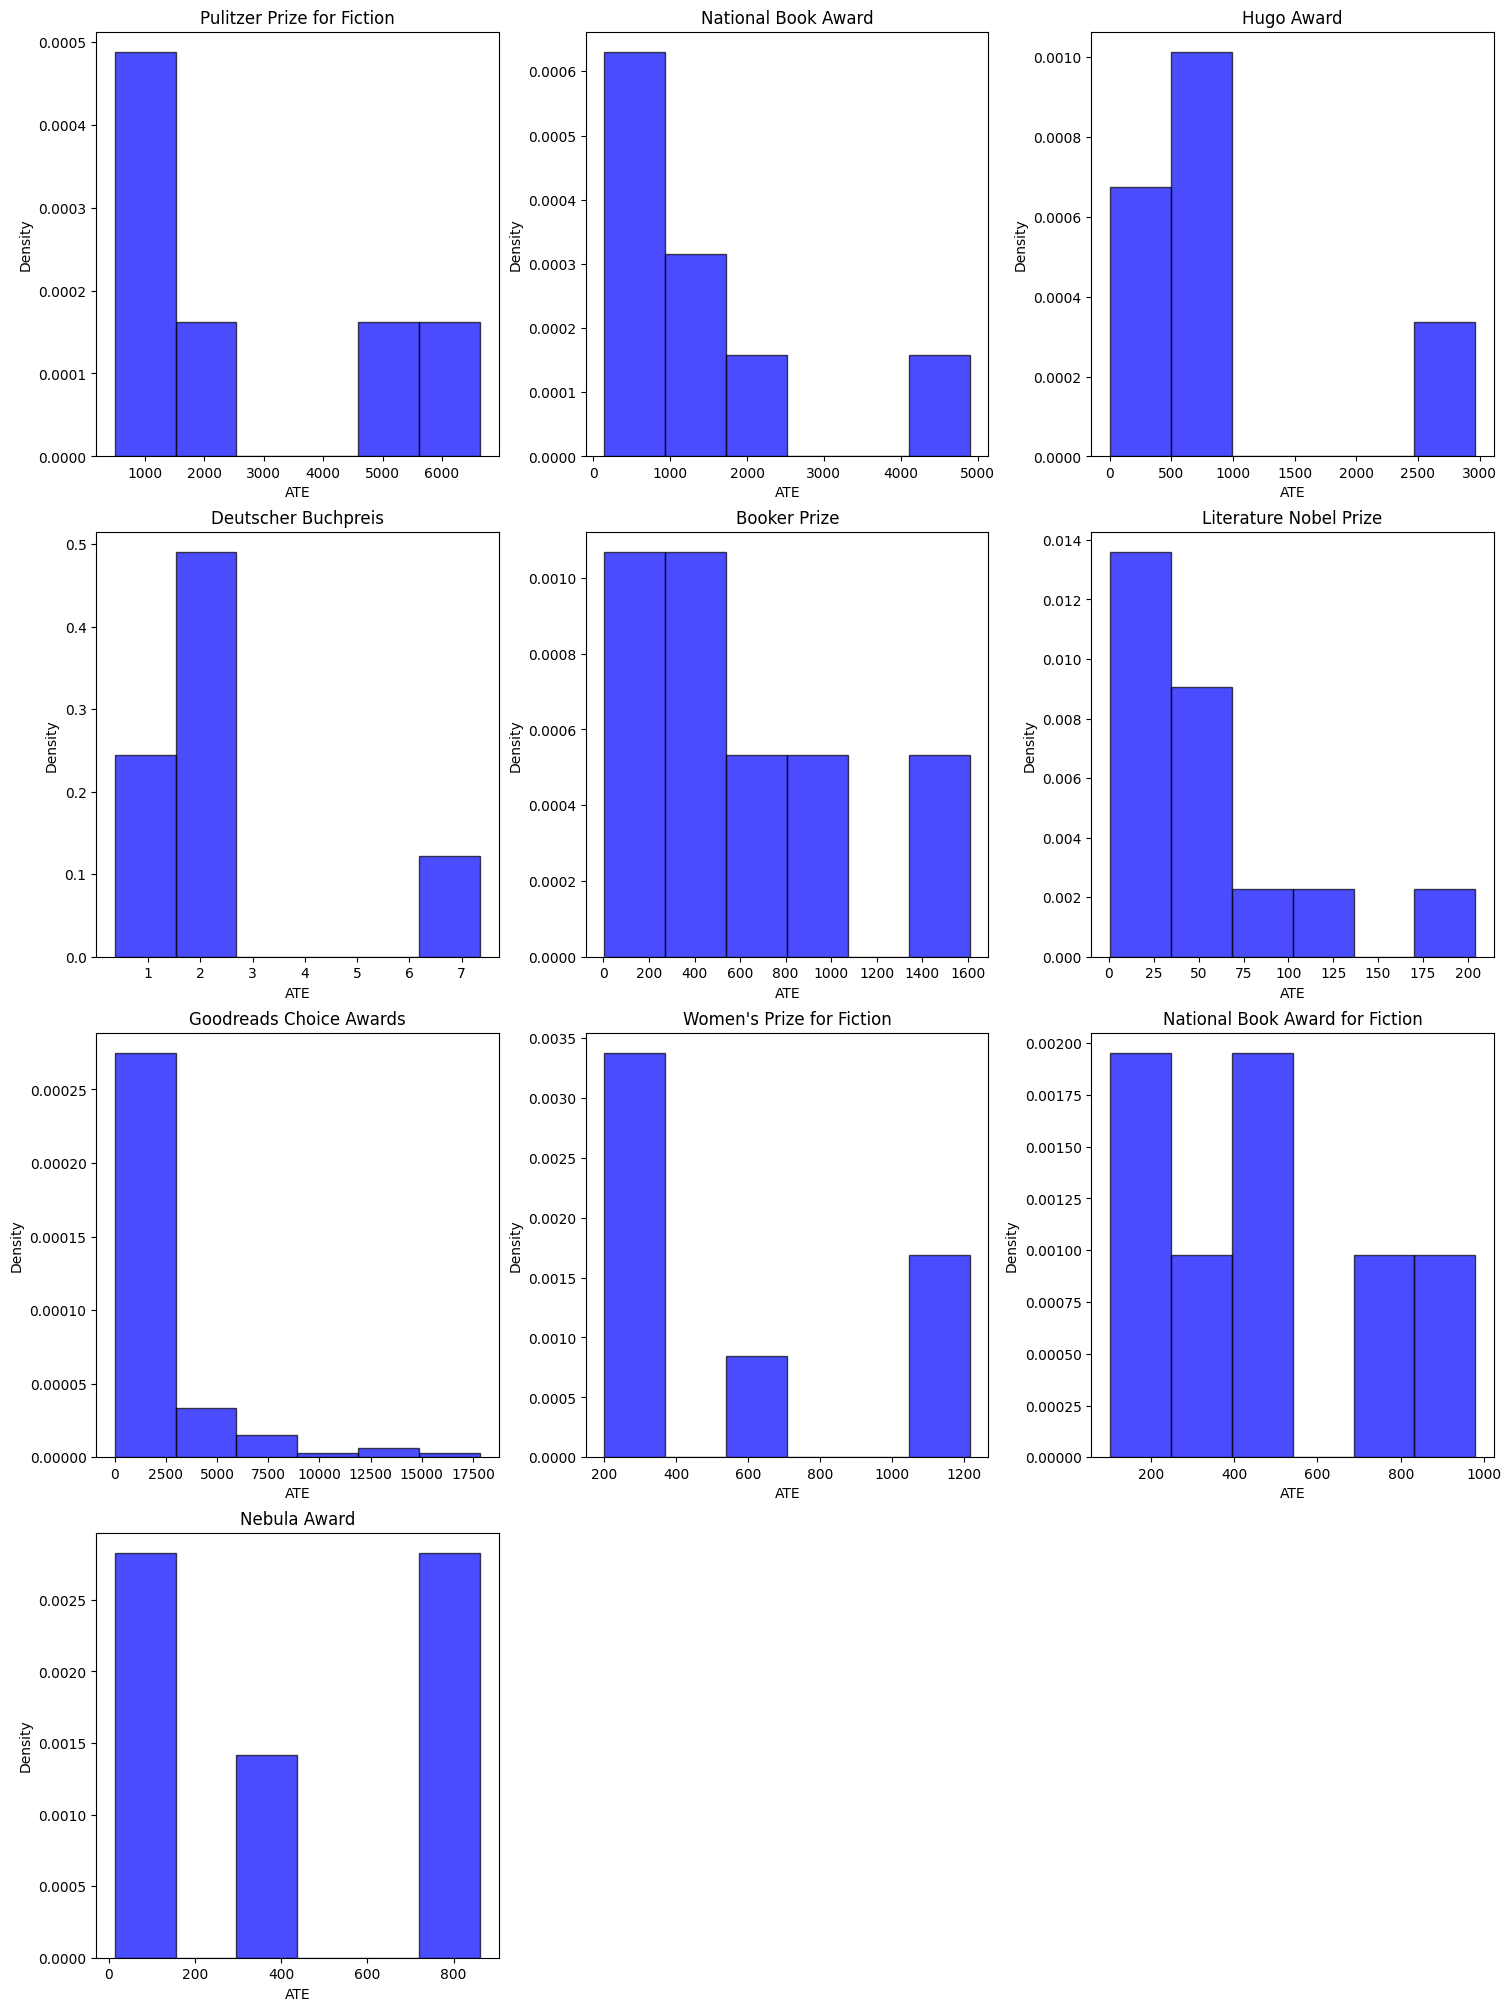

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of prizes
num_prizes = len(ate_by_prize)

# Create a grid of subplots
rows = int(np.ceil(num_prizes / 3))  # Arrange in rows of 3 columns
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each prize
for i, (prize, ate_values) in enumerate(ate_by_prize.items()):
    if len(ate_values) == 0:
        print(f"No valid ATE values for prize: {prize}")
        continue
    
    # Select the current axis
    ax = axes[i]
    
    # Plot histogram with logarithmic x-axis
    ax.hist(ate_values, bins=6, color='blue', alpha=0.7, edgecolor='black', density=True)
    
    # Add labels and title
    ax.set_xlabel('ATE', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'{prize}', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

Prize: Pulitzer Prize for Fiction
  Number of ATE values: 6
  Min: 491.1962, Max: 6644.1137
  Mean: 2762.7503, Std: 2331.0147


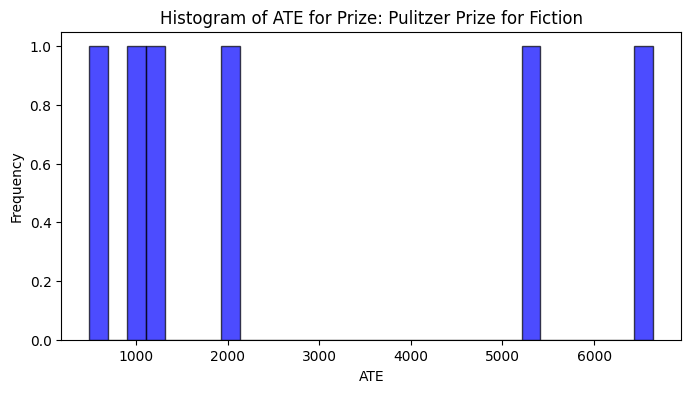

Prize: National Book Award
  Number of ATE values: 8
  Min: 143.5681, Max: 4903.3668
  Mean: 1493.4978, Std: 1415.2691


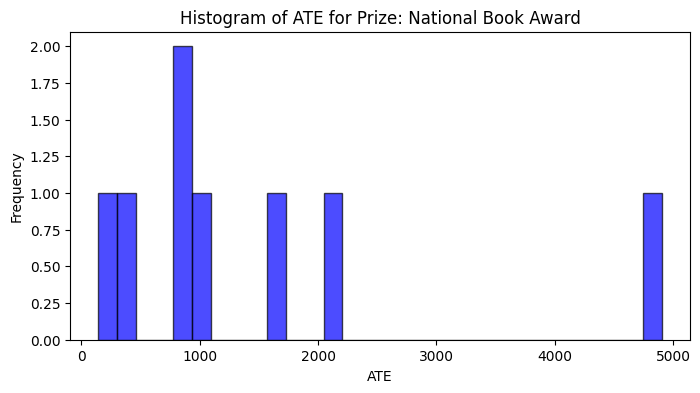

Prize: Hugo Award
  Number of ATE values: 6
  Min: 1.4028, Max: 2965.5078
  Mean: 894.6675, Std: 980.0905


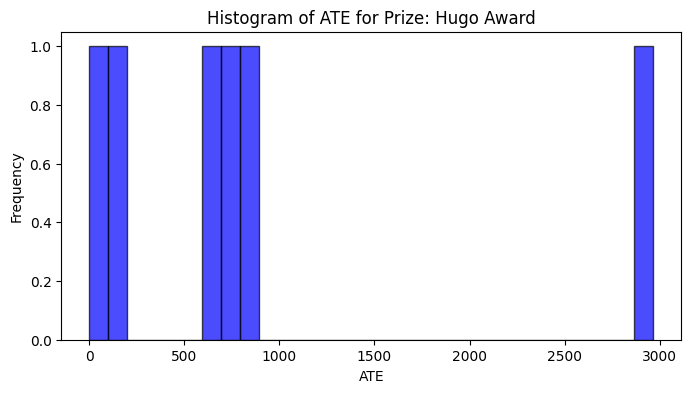

Prize: Deutscher Buchpreis
  Number of ATE values: 7
  Min: 0.3591, Max: 7.3580
  Mean: 2.3972, Std: 2.1457


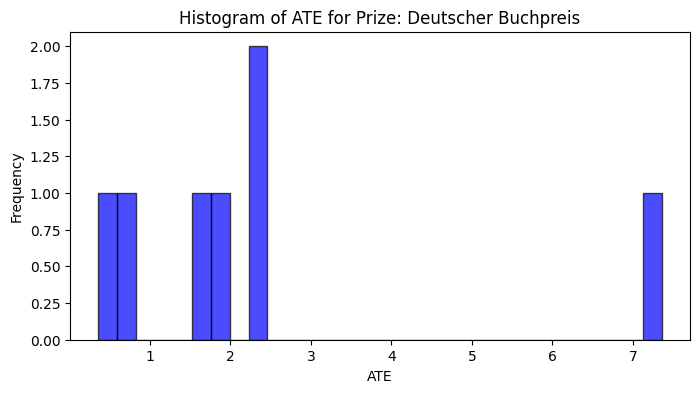

Prize: Booker Prize
  Number of ATE values: 7
  Min: 4.2364, Max: 1610.8945
  Mean: 577.4930, Std: 527.1004


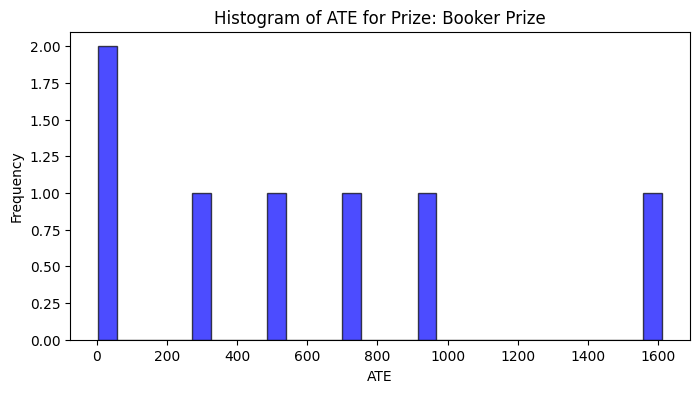

Prize: Literature Nobel Prize
  Number of ATE values: 13
  Min: 0.3828, Max: 204.3203
  Mean: 51.1521, Std: 56.8459


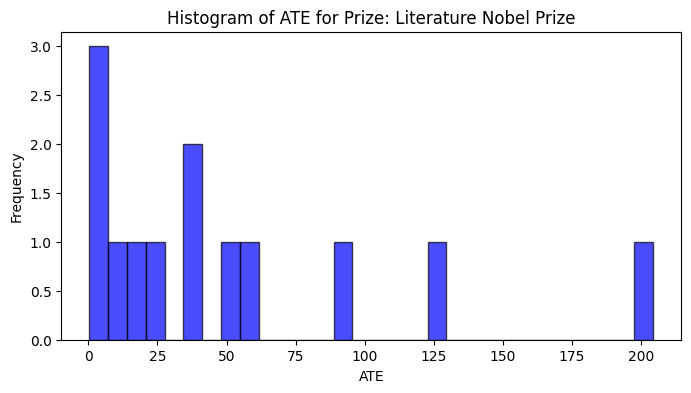

Prize: Goodreads Choice Awards
  Number of ATE values: 110
  Min: 0.2452, Max: 17855.2123
  Mean: 1514.0714, Std: 3038.9177


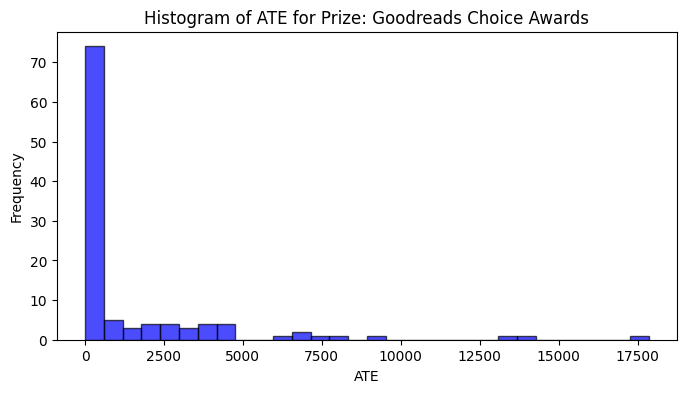

Prize: Women's Prize for Fiction
  Number of ATE values: 7
  Min: 201.0992, Max: 1216.7203
  Mean: 576.0512, Std: 389.2334


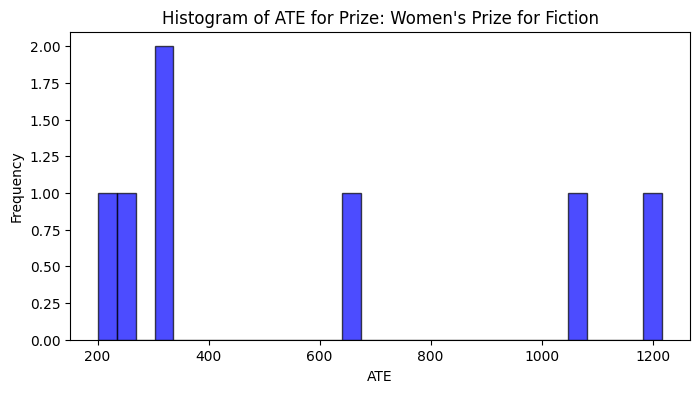

Prize: National Book Award for Fiction
  Number of ATE values: 7
  Min: 101.7697, Max: 979.2653
  Mean: 458.6154, Std: 294.8579


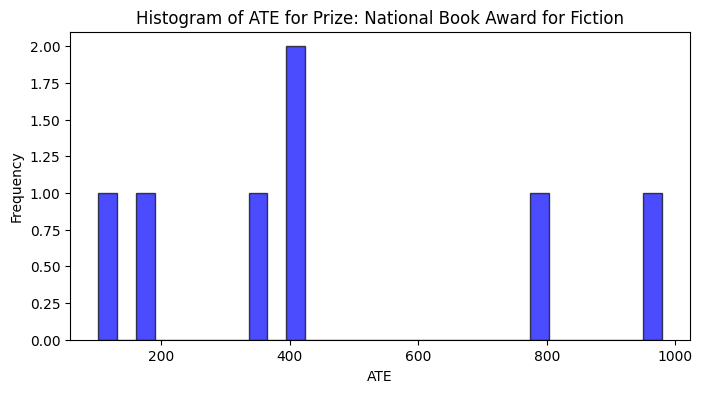

Prize: Nebula Award
  Number of ATE values: 5
  Min: 13.0310, Max: 862.0170
  Mean: 391.9676, Std: 359.0899


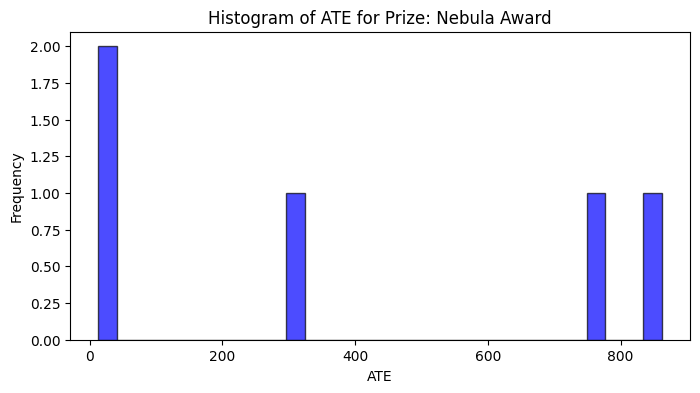

In [10]:
import matplotlib.pyplot as plt

# Inspect ATE distributions for each prize
for prize, ate_values in ate_by_prize.items():
    if len(ate_values) == 0:
        print(f"No ATE values for prize: {prize}")
        continue
    
    # Print summary statistics
    print(f"Prize: {prize}")
    print(f"  Number of ATE values: {len(ate_values)}")
    print(f"  Min: {np.min(ate_values):.4f}, Max: {np.max(ate_values):.4f}")
    print(f"  Mean: {np.mean(ate_values):.4f}, Std: {np.std(ate_values):.4f}")
    
    # Plot histogram for visual inspection
    plt.figure(figsize=(8, 4))
    plt.hist(ate_values, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of ATE for Prize: {prize}')
    plt.xlabel('ATE')
    plt.ylabel('Frequency')
    plt.show()

In [12]:
import numpy as np

# Preprocess ATE values with log transformation
preprocessed_ate_by_prize = {}
min_samples = 5  # Minimum number of ATE values required

for prize, ate_values in ate_by_prize.items():
    if len(ate_values) < min_samples:
        print(f"Skipping prize: {prize} (insufficient data)")
        continue
    
    # Shift values to ensure positivity (add a small constant if needed)
    ate_values = np.array(ate_values)
    ate_values_shifted = ate_values + np.abs(np.min(ate_values)) + 1e-6  # Avoid log(0)
    
    # Apply log transformation
    log_ate_values = np.log(ate_values_shifted)
    
    # Store preprocessed values
    preprocessed_ate_by_prize[prize] = log_ate_values

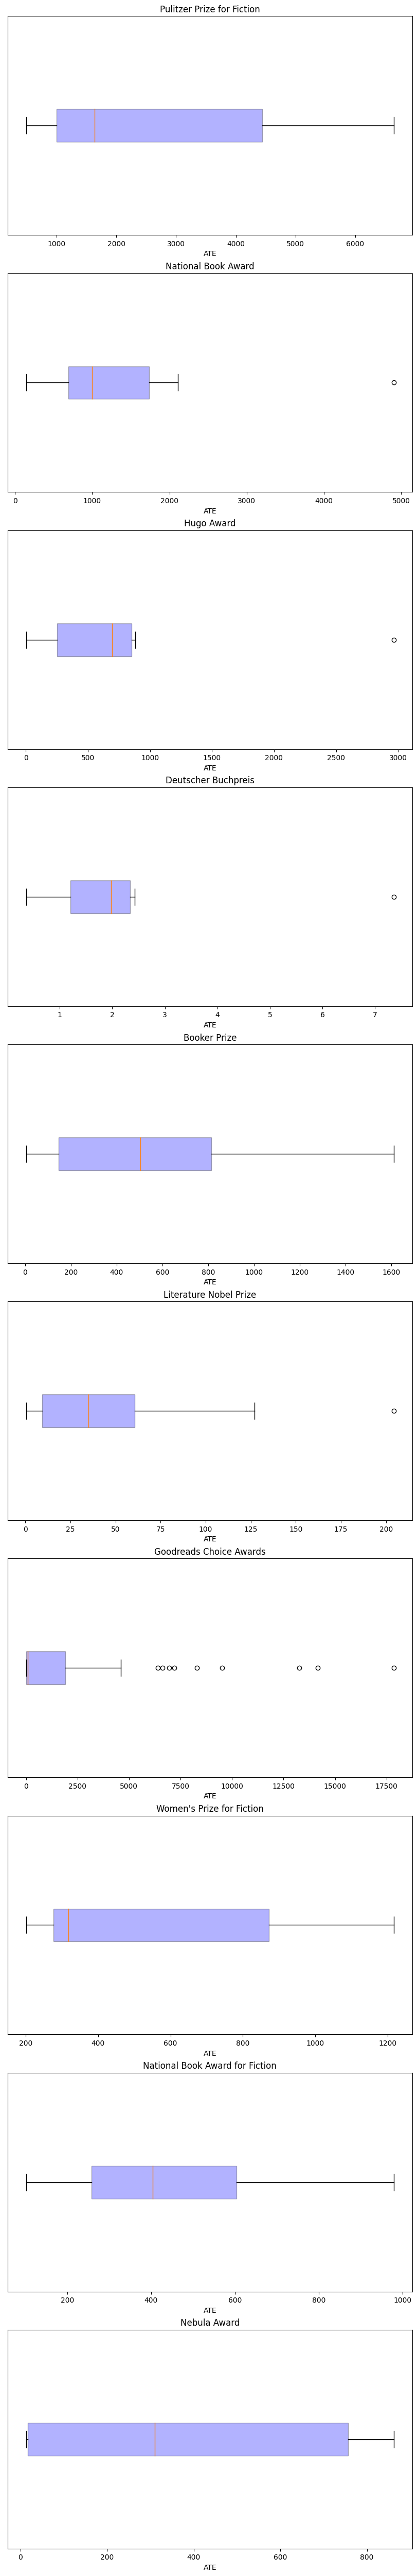

In [ ]:
import matplotlib.pyplot as plt

# Number of prizes
num_prizes = len(ate_by_prize)

# Create a single-column grid of subplots
fig, axes = plt.subplots(num_prizes, 1, figsize=(8, 5 * num_prizes), constrained_layout=True)

# If there's only one prize, ensure axes is iterable
if num_prizes == 1:
    axes = [axes]

# Plot boxplots for each prize
for i, (prize, ate_values) in enumerate(ate_by_prize.items()):
    if len(ate_values) == 0:
        print(f"No ATE values for prize: {prize}")
        continue
    
    # Select the current axis
    ax = axes[i]
    
    # Create boxplot
    ax.boxplot(ate_values, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
    
    # Add labels and title
    ax.set_xlabel('ATE', fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_title(f'{prize}', fontsize=12)

# Show the plot
plt.savefig('outcomes/boxplots_ate_by_prize.png', bbox_inches='tight', dpi=300)
plt.show()

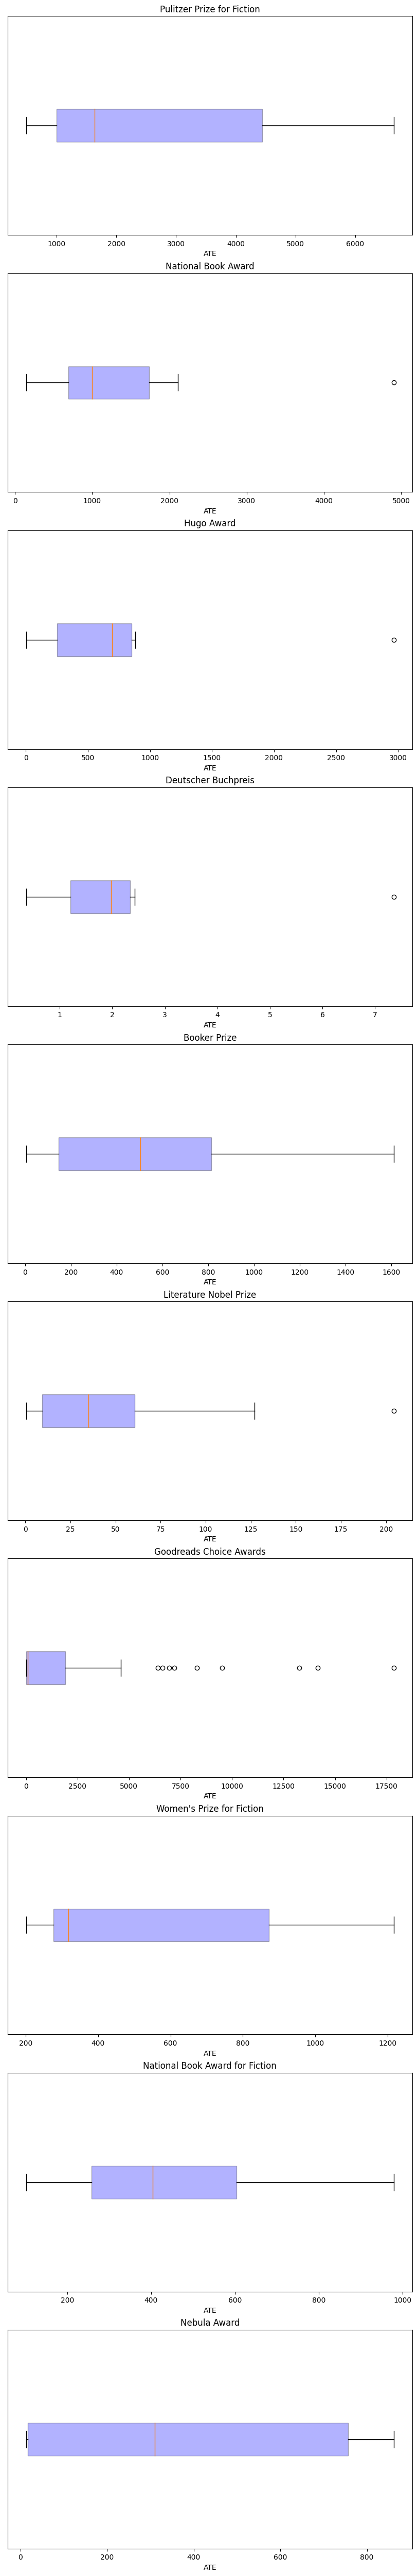

In [ ]:
import matplotlib.pyplot as plt

# Number of prizes
num_prizes = len(ate_by_prize)

# Create a single-column grid of subplots
fig, axes = plt.subplots(num_prizes, 1, figsize=(8, 5 * num_prizes), constrained_layout=True)

# If there's only one prize, ensure axes is iterable
if num_prizes == 1:
    axes = [axes]

# Plot boxplots for each prize
for i, (prize, ate_values) in enumerate(ate_by_prize.items()):
    if len(ate_values) == 0:
        print(f"No ATE values for prize: {prize}")
        continue
    
    # Select the current axis
    ax = axes[i]
    
    # Create boxplot
    ax.boxplot(ate_values, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
    
    # Add labels and title
    ax.set_xlabel('ATE', fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_title(f'{prize}', fontsize=12)

# Show the plot
plt.savefig('boxplots_ate_by_prize.png', bbox_inches='tight', dpi=300)
plt.show()